# Unicorn Data Analysis!

### Unicorn is a popular term used in the venture capital industry to refer to a privately held startup company that has reached a valuation of $1B 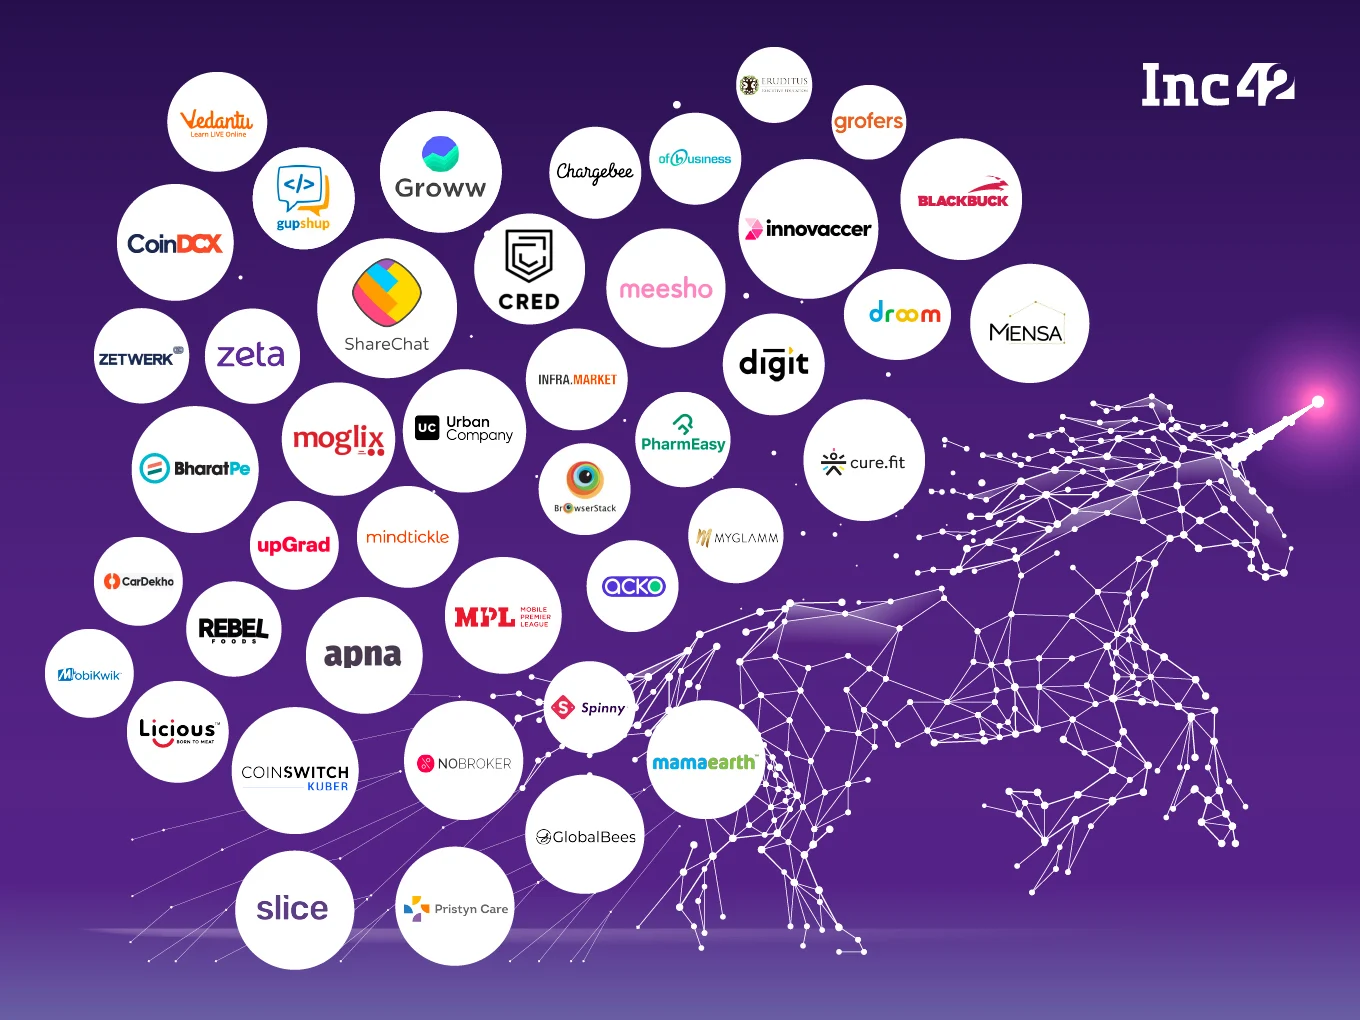

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style(style='whitegrid')
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df= pd.read_csv("D:\\ds\\unicorn2.csv")
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,04-07-2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$125,12-01-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,07-03-2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$45.6,12-12-2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


### Data cleaning

In [3]:
df.rename(columns = {'Valuation ($B)':'Valuation', 'Select Investors':'Investors'}, inplace = True)
df.head()

,Company,Valuation,Date Joined,Country,City,Industry,Investors
0,Bytedance,$140,04-07-2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$125,12-01-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,07-03-2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$45.6,12-12-2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
df.dtypes

Company        object
Valuation      object
Date Joined    object
Country        object
City           object
Industry       object
Investors      object
dtype: object

In [5]:
df['Valuation']= df['Valuation'].str.replace('$', '')


In [6]:
df.head()

,Company,Valuation,Date Joined,Country,City,Industry,Investors
0,Bytedance,140,04-07-2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,125,12-01-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,07-03-2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,45.6,12-12-2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


In [7]:
df.dtypes

Company        object
Valuation      object
Date Joined    object
Country        object
City           object
Industry       object
Investors      object
dtype: object

In [8]:
df.Valuation = pd.to_numeric(df.Valuation)

In [9]:
df.dtypes

Company         object
Valuation      float64
Date Joined     object
Country         object
City            object
Industry        object
Investors       object
dtype: object

In [10]:
df.rename(columns = {'Date Joined':'Date'}, inplace = True)

In [11]:

date = df.Date.str.split('/|-', expand =True)
df['year'] = date[2]
df['month'] = date[1]
df['day'] = date[0]

In [12]:
df.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,04-07-2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,07,04
1,SpaceX,125.0,12-01-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,01,12
2,SHEIN,100.0,07-03-2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,03,07
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,23,1
4,Klarna,45.6,12-12-2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,12,12


In [13]:
df.dtypes

Company       object
Valuation    float64
Date          object
Country       object
City          object
Industry      object
Investors     object
year          object
month         object
day           object
dtype: object

In [14]:
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)
df.dtypes

Company       object
Valuation    float64
Date          object
Country       object
City          object
Industry      object
Investors     object
year           int64
month          int64
day            int64
dtype: object

In [15]:
df.isnull().sum()

Company       0
Valuation     0
Date          0
Country       0
City         17
Industry      0
Investors     1
year          0
month         0
day           0
dtype: int64

In [16]:
df=df.dropna(subset=['Investors' , 'City'])
df.isnull().sum()

Company      0
Valuation    0
Date         0
Country      0
City         0
Industry     0
Investors    0
year         0
month        0
day          0
dtype: int64

### Most prominent investors and venture capital firms ?

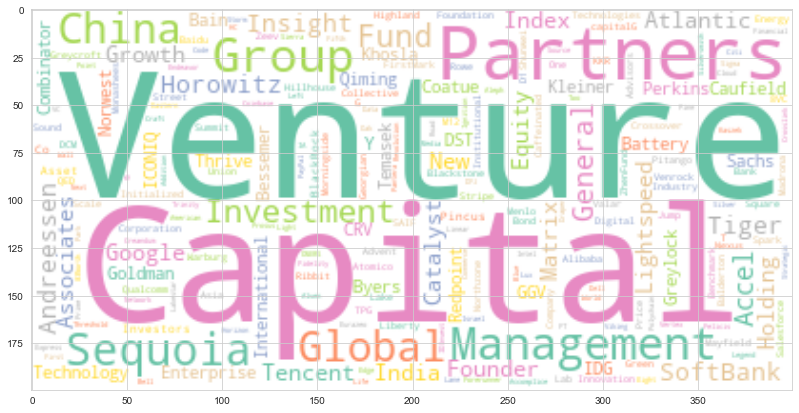

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
wordCloud = WordCloud(max_words=250, background_color='white' ,  random_state=1, colormap='Set2', collocations=False).generate(','.join(df.Investors))
plt.figure(figsize=(25,7))

plt.imshow(wordCloud, interpolation='bilinear')
plt.show()

### Sequoia Capital  China,  Tiger Global Management, Andreessen Horowitz, Soft Bank 

### Which year witnessed the most number of unicorns ?

In [18]:
df.year.value_counts()

2021    516
2022    191
2020    109
2019    102
2018    101
2017     43
2015     33
2016     21
2014     13
2012      4
2013      3
2011      2
2007      1
Name: year, dtype: int64

<AxesSubplot:title={'center':'no. of unicorns over the years'}, xlabel='years joined', ylabel='no of unicorns'>

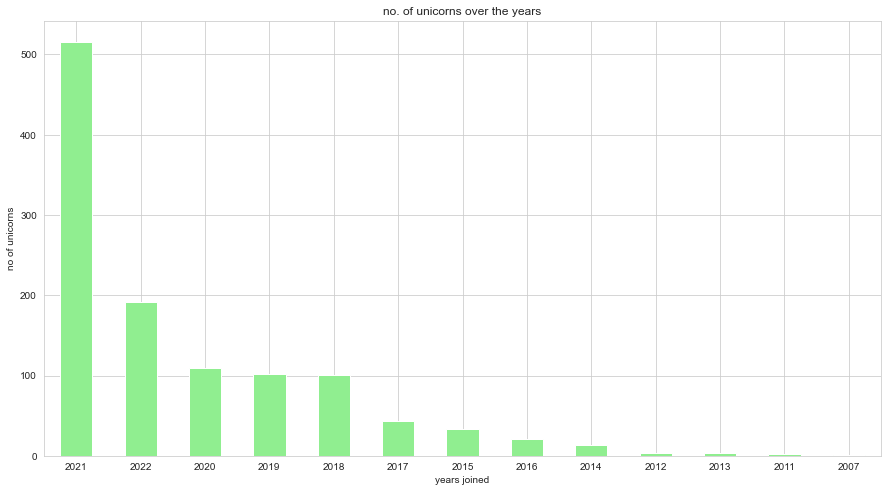

In [19]:
plt.figure(figsize=(15,8))
plt.title('no. of unicorns over the years')
plt.xlabel('years joined')
plt.ylabel('no of unicorns')
df.year.value_counts().plot(kind='bar', rot=0, color='lightgreen')

### Which country has the most no. of unicorns?

In [20]:
df.Country.value_counts().head(20)

United States     618
China             173
India              67
United Kingdom     44
Germany            29
France             24
Israel             22
Canada             19
Brazil             17
South Korea        13
Sweden              8
Australia           8
Mexico              7
Netherlands         7
Japan               6
Ireland             6
Switzerland         6
Indonesia           6
Norway              5
Finland             4
Name: Country, dtype: int64

<AxesSubplot:title={'center':'Top 20 countries with most unicorns'}, xlabel='countries', ylabel='no of unicorns'>

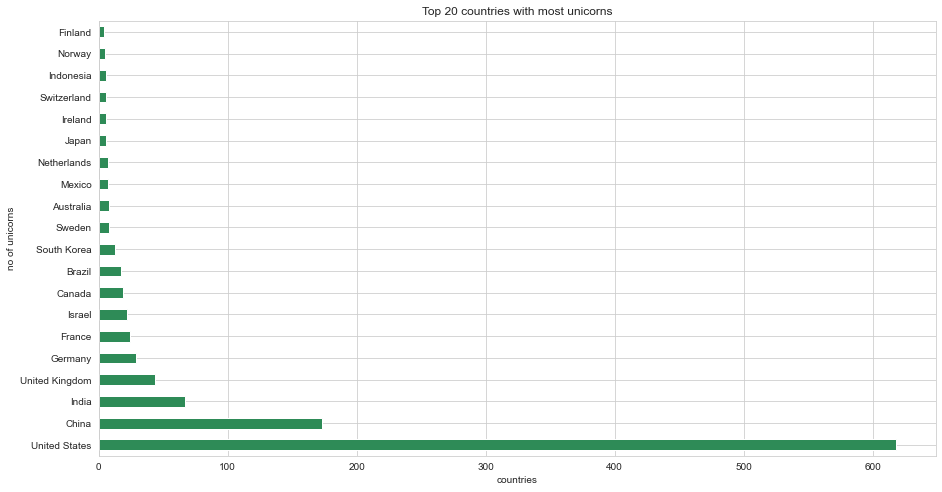

In [21]:
plt.figure(figsize=(15,8))
plt.title('Top 20 countries with most unicorns')
plt.xlabel('countries')
plt.ylabel('no of unicorns')
df.Country.value_counts().head(20).plot(kind='barh', rot=0, color='seagreen' )

### Plotting countries and the no. of companies on a world map

In [22]:
import geopandas as gpd

df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(f"{type(df_world)}, {df_world.geometry.name}")

df_world.head()



<class 'geopandas.geodataframe.GeoDataFrame'>, geometry


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [23]:
df_world.geometry.geom_type.value_counts()

Polygon         148
MultiPolygon     29
dtype: int64

In [24]:

df_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [25]:
df_world['name'].replace('United States of America','United States',inplace=True)

In [26]:

df_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

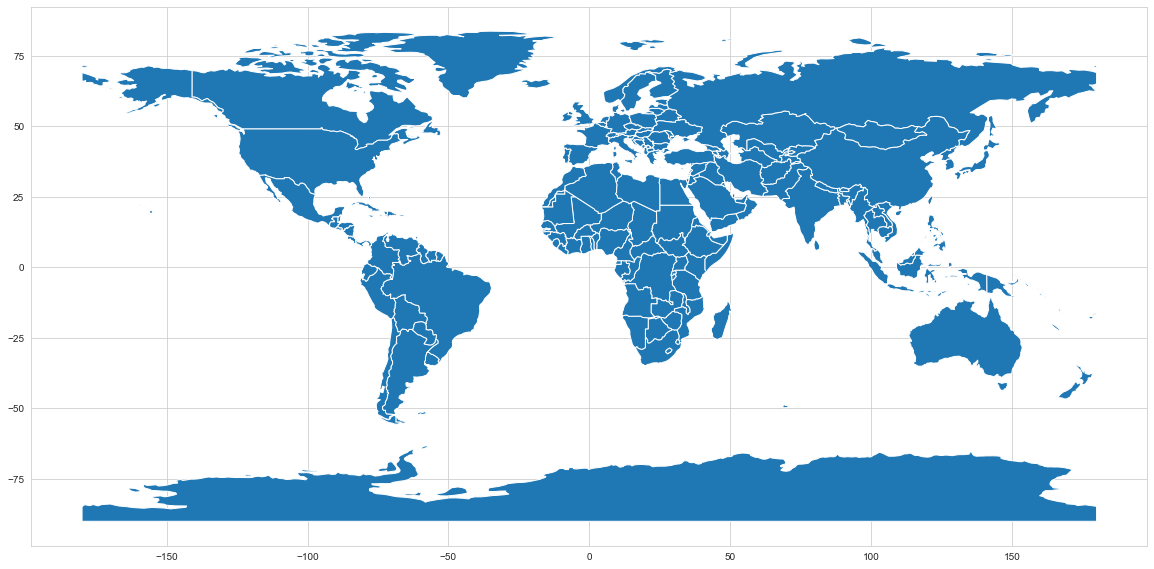

In [27]:
df_world.plot(figsize=(20,10))

In [28]:
df['counter']=1
df
df1=df.groupby('Country')
df1.sum().head()


,Valuation,year,month,day,counter
Country,,,,,
Argentina,2.45,2021,13,8,1
Australia,54.40,16165,113,41,8
Austria,7.61,4042,38,9,2
Belgium,8.95,6062,82,9,3
Bermuda,1.60,2017,14,4,1


In [29]:
df2 = df_world.merge(df1.sum(), how="left", left_on=['name'], right_on=['Country'])
print("Type of DataFrame : ", type(df2), df.shape[0])
df2.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 1139


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Valuation,year,month,day,counter
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",49.23,38401.0,282.0,97.0,19.0
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2035.46,1248578.0,10031.0,3817.0,618.0


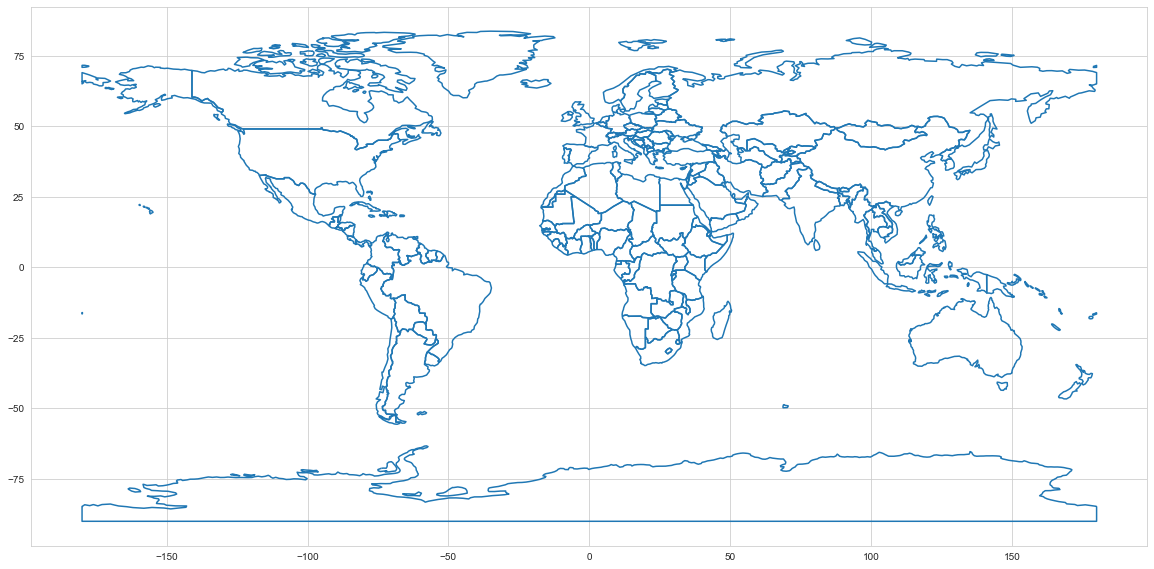

In [30]:
ax = df_world["geometry"].boundary.plot(figsize=(20,16))

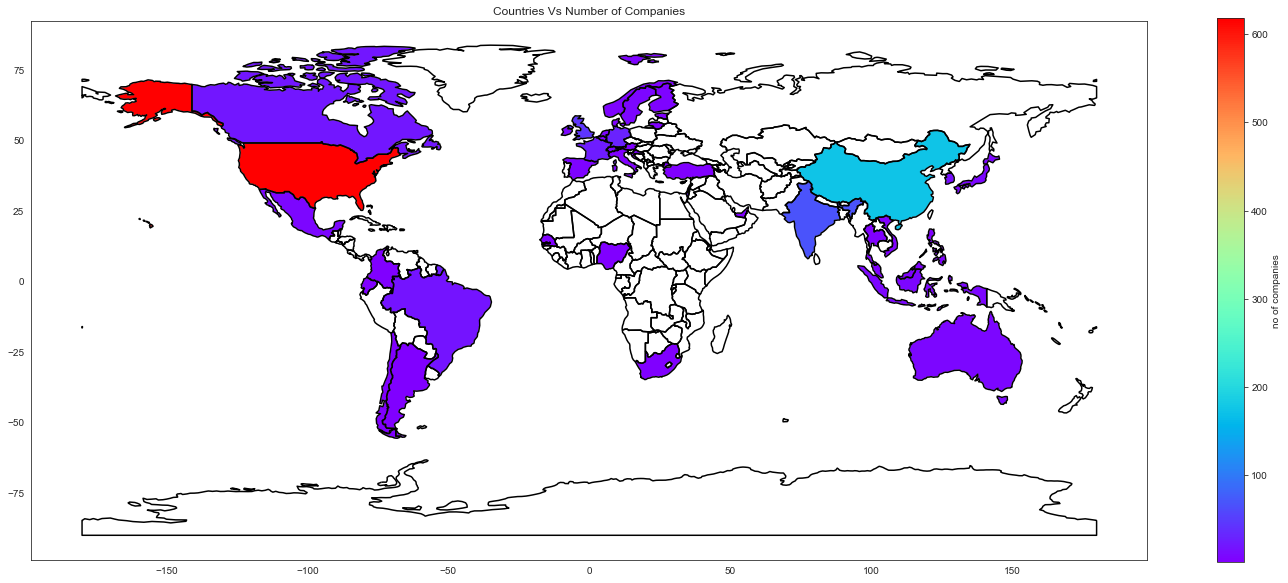

In [31]:

sns.set_style(style='white')

ax = df_world["geometry"].boundary.plot(figsize=(25,10), color='black')
df2.plot( column="counter",  ax=ax,  cmap='rainbow',
                     legend=True, legend_kwds={"label": "no of companies", "orientation":"vertical"}, figsize=(20,16) )
ax.set_title("Countries Vs Number of Companies")
plt.show()

### Top 20 cities with most unicorns ?

<AxesSubplot:title={'center':'Top 20 cities with most unicorns'}, xlabel='cities', ylabel='no of unicorns'>

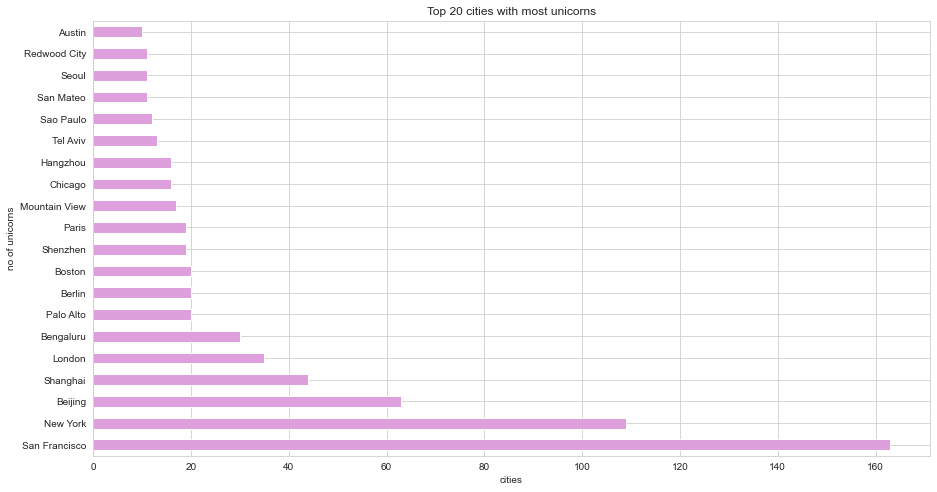

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.title('Top 20 cities with most unicorns')
plt.xlabel('cities')
plt.ylabel('no of unicorns')
df.City.value_counts().head(20).plot(kind='barh', rot=0, color='plum' )

### Indian Fintech unicorns ?

In [33]:
df[df.Country=='India'][df[df.Country=='India'].Industry == 'Fintech']['Company']

84                              Razorpay
100     National Stock Exchange of India
145                            Pine Labs
187                                 CRED
210                      Digit Insurance
251                               Upstox
302                                Groww
318                             BharatPe
375                         PolicyBazaar
418                              CoinDCX
510                     CoinSwitch Kuber
525                                Slice
731                           CredAvenue
846               Acko General Insurance
1065                            MobiKwik
1148                                Open
Name: Company, dtype: object

### Indian unicorns in the Data Analytics Industry?

In [34]:
df[df.Country=='India'][df[df.Country=='India'].Industry == 'Data management & analytics']['Company']

1107    Fractal Analytics
Name: Company, dtype: object

### Chinese unicorns in the Data Analytics Industry?

In [35]:
df[df.Country=='China'][df[df.Country=='China'].Industry == 'Data management & analytics']['Company']

554    Jusfoun Big Data
596            DT Dream
Name: Company, dtype: object

### Chinese Fintech unicorns ?

In [36]:
df[df.Country=='China'][df[df.Country=='China'].Industry == 'Fintech']['Company']

371             Cgtz
584          Baiwang
740     Huisuanzhang
820             TELD
893          JimuBox
974           WeBull
984       Hyperchain
1026        Xiaobing
Name: Company, dtype: object

### American internet software services unicorns? 

In [37]:
df[df.Country=='United States'][df[df.Country=='United States'].Industry == 'internet software services']['Company']

Series([], Name: Company, dtype: object)

### On an average which country's startups have higher valuation?

In [38]:
df5 = df_world.merge(df1.mean(), how="left", left_on=['name'], right_on=['Country'])
print("Type of DataFrame : ", type(df5), df.shape[0])
df5.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 1139


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Valuation,year,month,day,counter
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2.591053,2021.105263,14.842105,5.105263,1.0
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3.293625,2020.352751,16.231392,6.176375,1.0


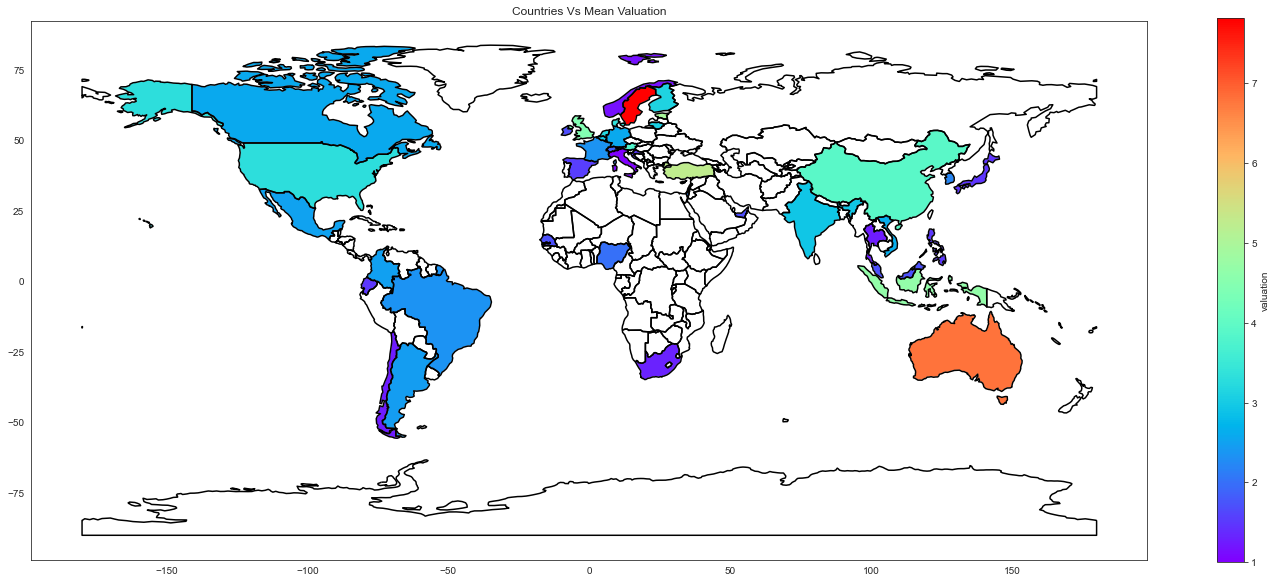

In [39]:
sns.set_style(style='white')

ax = df_world["geometry"].boundary.plot(figsize=(25,10), color='black')
df5.plot( column="Valuation",  ax=ax,  cmap='rainbow',
                     legend=True, legend_kwds={"label": "valuation", "orientation":"vertical"}, figsize=(20,16) )
ax.set_title("Countries Vs Mean Valuation")
plt.show()

In [40]:
df3= df.groupby('Country').mean()

df3.sort_values(by='Valuation', ascending=False).head(20)

,Valuation,year,month,day,counter
Country,,,,,
Seychelles,10.000000,2022.000000,10.000000,5.000000,1.0
Sweden,7.815000,2019.750000,17.250000,7.250000,1.0
Australia,6.800000,2020.625000,14.125000,5.125000,1.0
Turkey,5.256667,2021.333333,28.000000,3.666667,1.0
Estonia,4.950000,2020.000000,27.500000,3.000000,1.0
Indonesia,4.666667,2020.500000,11.333333,6.333333,1.0
United Kingdom,4.437500,2019.886364,15.772727,6.840909,1.0
China,3.904971,2018.520231,15.739884,6.283237,1.0
Hong Kong,3.837500,2017.750000,16.500000,4.250000,1.0


In [41]:
df[df['Country']=='Seychelles']

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day,counter
56,KuCoin,10.0,05-10-2022,Seychelles,Victoria,Fintech,"IDG Capital, Matrix Partners China, Jump Crypto",2022,10,5,1


<AxesSubplot:ylabel='Country'>

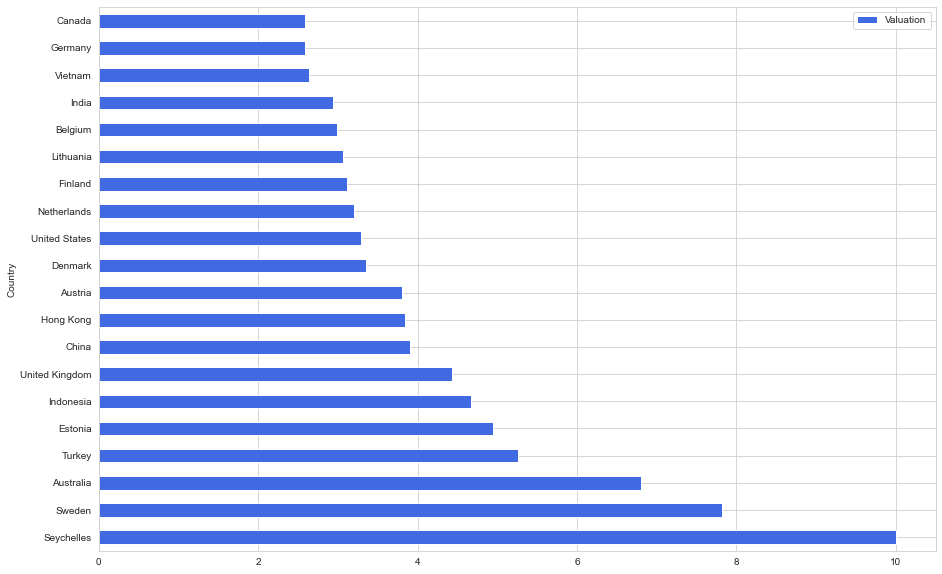

In [60]:
sns.set_style('whitegrid')
df3.sort_values(by='Valuation', ascending=False).head(20).plot(kind='barh', y='Valuation' , figsize=(15, 10), color='royalblue' , rot=0)

### Top US cities with most number of unicorns

In [43]:
u = df[df['Country']=='United States']

In [44]:
u.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day,counter
1,SpaceX,125.0,12-01-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,1,12,1
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,23,1,1
7,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2014,30,12,1
8,Databricks,38.0,02-05-2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2019,5,2,1
10,Epic Games,31.5,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",2018,26,10,1


In [45]:
u.City.value_counts()

San Francisco    163
New York         109
Palo Alto         20
Boston            20
Mountain View     17
                ... 
Raleigh            1
Chatham            1
Fort Lee           1
Westerville        1
Morrisville        1
Name: City, Length: 132, dtype: int64

<AxesSubplot:title={'center':'Top 20 US cities with most unicorns'}, xlabel='cities', ylabel='no of unicorns'>

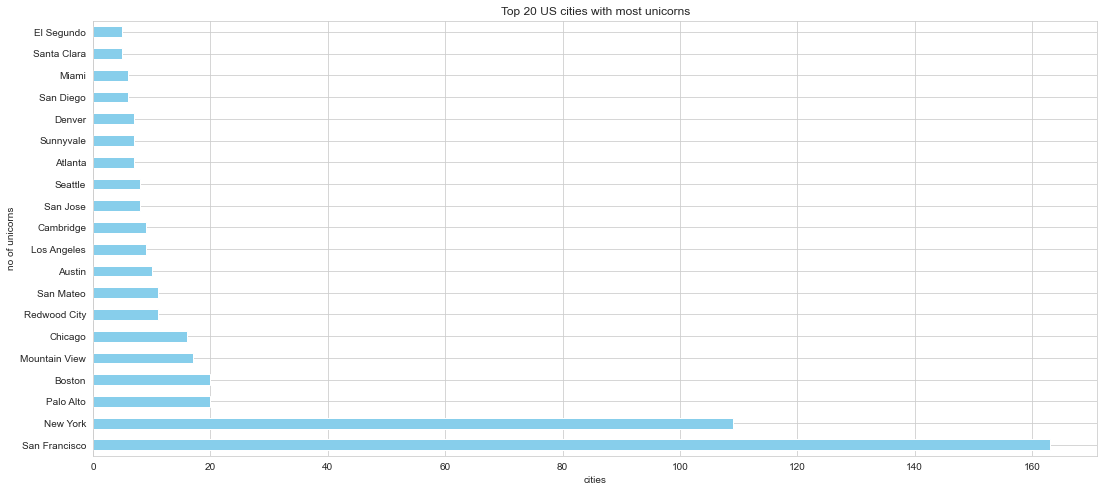

In [61]:
plt.figure(figsize=(18,8))
plt.title('Top 20 US cities with most unicorns')
plt.xlabel('cities')
plt.ylabel('no of unicorns')
u.City.value_counts().head(20).plot(kind='barh', rot=0, color='skyblue' )

### Valuation pattern over the years?

In [47]:
grouped_df= df['Valuation'].groupby(df['year']).describe()
grouped_df

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2007,1.0,1.380000,NaN,1.38,1.380,1.38,1.380,1.38
2011,2.0,25.650000,28.213561,5.70,15.675,25.65,35.625,45.60
2012,4.0,39.000000,58.532043,2.00,2.000,14.50,51.500,125.00
2013,3.0,3.333333,3.617089,1.00,1.250,1.50,4.500,7.50
2014,13.0,12.721538,26.733170,1.00,1.100,3.80,4.580,95.00
2015,33.0,2.753030,3.173266,1.00,1.000,1.60,2.400,15.00
2016,21.0,3.817619,4.686750,1.00,1.100,1.59,4.500,20.00
2017,43.0,6.545349,21.269860,1.00,1.070,1.52,3.510,140.00
2018,101.0,5.720594,11.444473,1.00,1.160,2.17,6.600,100.00


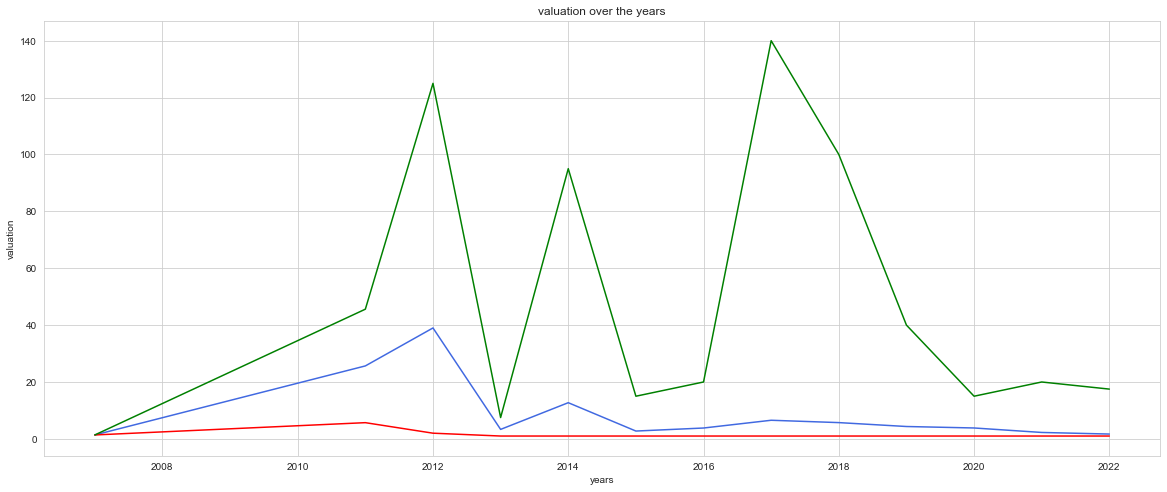

In [62]:

fig, x=plt.subplots(figsize=(20,8))
x.plot(grouped_df['mean'], color='royalblue')
x.plot(grouped_df['min'], color= 'red')
x.plot(grouped_df['max'], color= 'green')


plt.xlabel('years')
plt.ylabel('valuation')
plt.title('valuation over the years')
plt.show()

### Most valued startups?

In [49]:
df.sort_values(by='Valuation', inplace=True, ascending=False)
df.head(20)

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day,counter
0,Bytedance,140.0,04-07-2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,7,4,1
1,SpaceX,125.0,12-01-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,1,12,1
2,SHEIN,100.0,07-03-2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,3,7,1
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,23,1,1
4,Klarna,45.6,12-12-2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,12,12,1
5,Canva,40.0,01-08-2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,8,1,1
6,Checkout.com,40.0,05-02-2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",2019,2,5,1
7,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2014,30,12,1
8,Databricks,38.0,02-05-2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2019,5,2,1
9,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",2018,26,4,1


<AxesSubplot:xlabel='Company'>

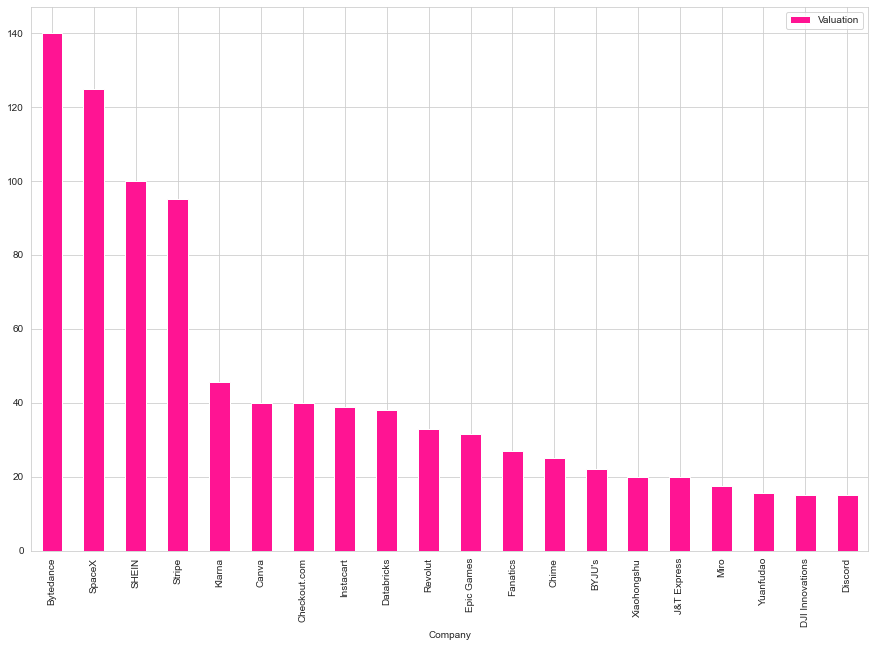

In [63]:

df.head(20).plot(x="Company", y="Valuation", kind="bar",color='deeppink' ,  figsize=(15, 10) )



### Most valued Indian startups?

In [51]:
i= df[df['Country']=='India']
i

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day,counter
14,BYJU's,22.0,7/25/2017,India,Bengaluru,Edtech,"Tencent Holdings, Lightspeed India Partners, S...",2017,25,7,1
46,Swiggy,10.7,6/21/2018,India,Bengaluru,"Supply chain, logistics, & delivery","Accel India, SAIF Partners, Norwest Venture Pa...",2018,21,6,1
65,OYO Rooms,9.0,9/25/2018,India,Gurugram,Travel,"SoftBank Group, Sequoia Capital India,Lightspe...",2018,25,9,1
77,Dream11,8.0,04-09-2019,India,Mumbai,Internet software & services,"Kaalari Capital, Tencent Holdings, Steadview C...",2019,9,4,1
84,Razorpay,7.5,10-11-2020,India,Bengaluru,Fintech,"Sequoia Capital India, Tiger Global Management...",2020,11,10,1
...,...,...,...,...,...,...,...,...,...,...,...
1123,Hasura,1.0,2/22/2022,India,Bengaluru,Internet software & services,"Nexus Venture Partners, Vertex Ventures, STRIVE",2022,22,2,1
1107,Fractal Analytics,1.0,01-05-2022,India,Mumbai,Data management & analytics,"TPG Capital, Apax Partners, TA Associates",2022,5,1,1
1112,Darwinbox,1.0,1/25/2022,India,Hyderabad,Internet software & services,"Lightspeed India Partners, Sequoia Capital Ind...",2022,25,1,1
886,Snapdeal,1.0,5/21/2014,India,New Delhi,E-commerce & direct-to-consumer,"SoftBankGroup, Blackrock, Alibaba Group",2014,21,5,1


<AxesSubplot:xlabel='Company'>

<Figure size 1296x576 with 0 Axes>

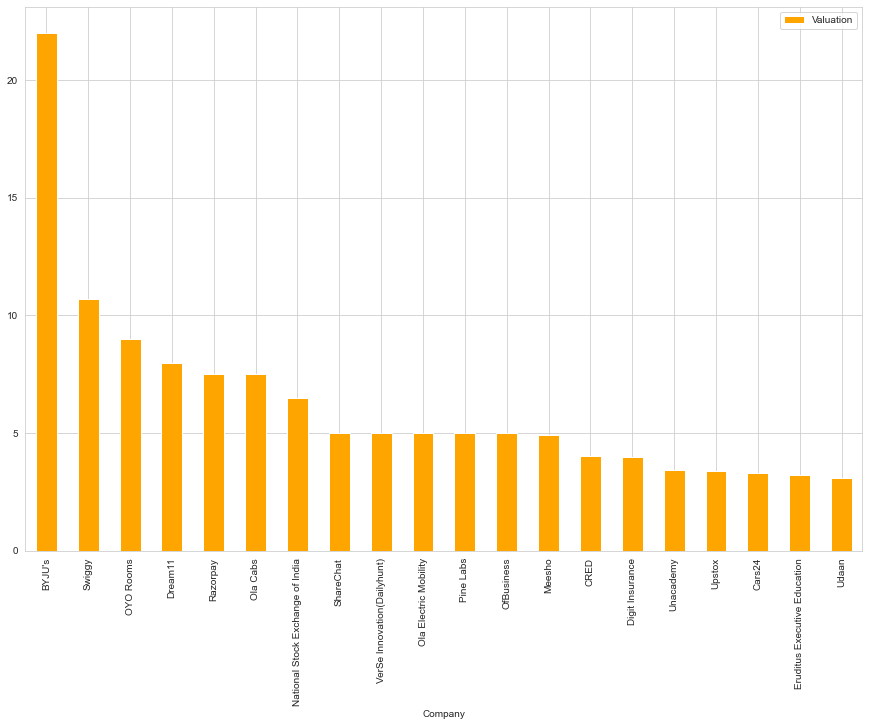

In [64]:
plt.figure(figsize=(18,8))
i.head(20).plot(x="Company", y="Valuation", kind="bar",color='orange' , figsize=(15, 10))

### Which industry has most number of unicorns?

In [53]:

df['Industry']= df['Industry'].str.replace('I', 'i')
df['Industry']= df['Industry'].str.replace('S', 's')

In [54]:
df['Industry'].replace('internet software & services','internet software services',inplace=True)

In [55]:
ind = df.groupby('Industry').sum()
ind

,Valuation,year,month,day,counter
Industry,,,,,
Artificial intelligence,330.52,167659,1410,498,83
Auto & transportation,111.62,70672,565,214,35
Consumer & retail,80.34,54503,375,180,27
Cybersecurity,144.50,117196,854,360,58
Data management & analytics,140.79,88891,694,245,44
E-commerce & direct-to-consumer,427.31,226161,1667,761,112
Edtech,95.57,60583,487,179,30
Fintech,890.52,478890,3670,1464,237
Hardware,107.50,74705,579,256,37


In [56]:
ind.sort_values(by='counter', ascending=False)

,Valuation,year,month,day,counter
Industry,,,,,
Fintech,890.52,478890,3670,1464,237
internet software services,618.28,432382,3359,1350,214
E-commerce & direct-to-consumer,427.31,226161,1667,761,112
Health,221.66,177788,1404,508,88
Artificial intelligence,330.52,167659,1410,498,83
Other,301.36,133312,1082,400,66
Cybersecurity,144.50,117196,854,360,58
"supply chain, logistics, & delivery",175.37,115143,901,336,57
Data management & analytics,140.79,88891,694,245,44


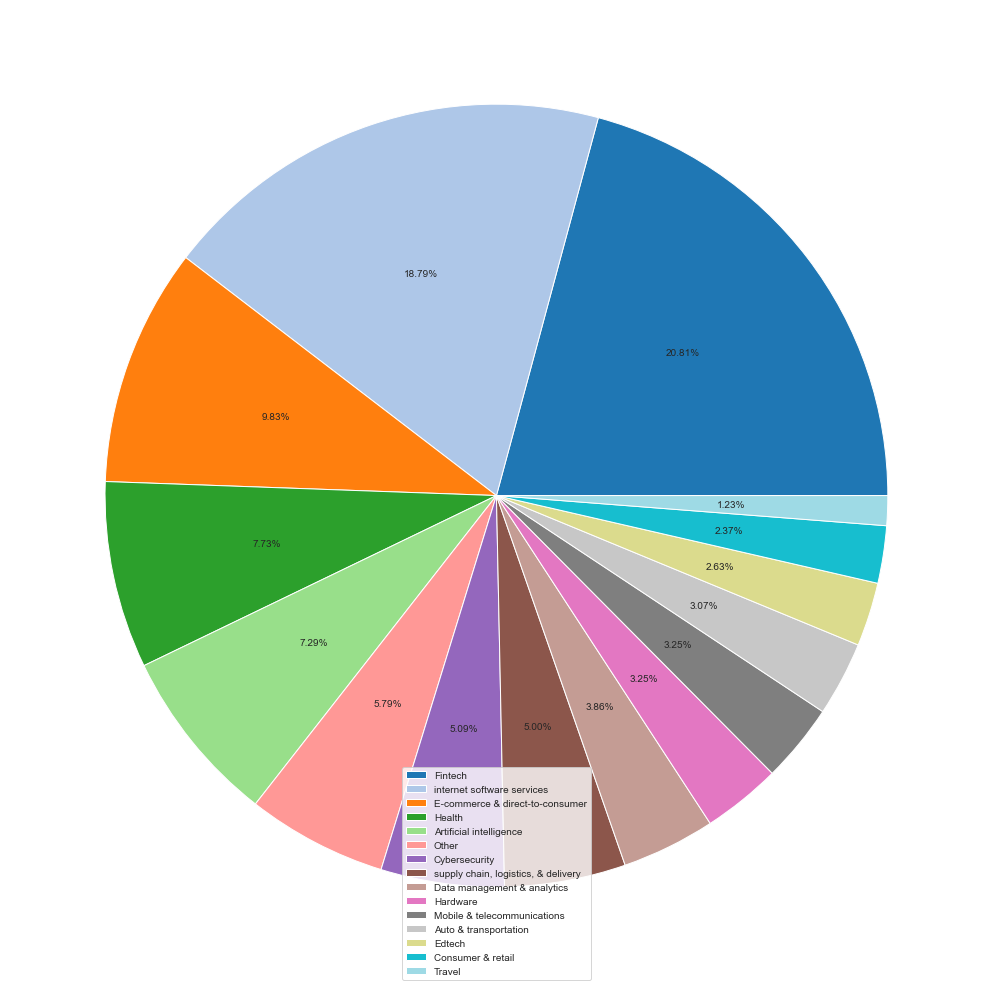

In [57]:

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct + '%') if pct > 1 else ''

my_labels = ('Fintech' , 'internet software services', 
              'E-commerce & direct-to-consumer' , 'Health', 
              'Artificial intelligence', 'Other' ,
             'Cybersecurity' ,'supply chain, logistics, & delivery' , 
             'Data management & analytics' , 'Hardware' ,
             'Mobile & telecommunications' ,  'Auto & transportation', 
             'Edtech' , 'Consumer & retail',  'Travel')
             
        

ax = df['Industry'].value_counts().plot(kind='pie', figsize=(25,18), autopct=autopct, labels=None, cmap='tab20')

ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=8, labels=my_labels)
#ind.sort_values(by='count', ascending=False).plot(kind='pie', y='count', autopct='%1.0f%%' )

### Which industry has most valued startups?

In [58]:
df4= df.groupby('Industry').mean()

df4.sort_values(by='Valuation', ascending=False).head(20)

,Valuation,year,month,day,counter
Industry,,,,,
Other,4.566061,2019.878788,16.393939,6.060606,1.0
Artificial intelligence,3.982169,2019.987952,16.987952,6.000000,1.0
E-commerce & direct-to-consumer,3.815268,2019.294643,14.883929,6.794643,1.0
Fintech,3.757468,2020.632911,15.485232,6.177215,1.0
Data management & analytics,3.199773,2020.250000,15.772727,5.568182,1.0
Auto & transportation,3.189143,2019.200000,16.142857,6.114286,1.0
Edtech,3.185667,2019.433333,16.233333,5.966667,1.0
"supply chain, logistics, & delivery",3.076667,2020.052632,15.807018,5.894737,1.0
Consumer & retail,2.975556,2018.629630,13.888889,6.666667,1.0


<AxesSubplot:ylabel='Industry'>

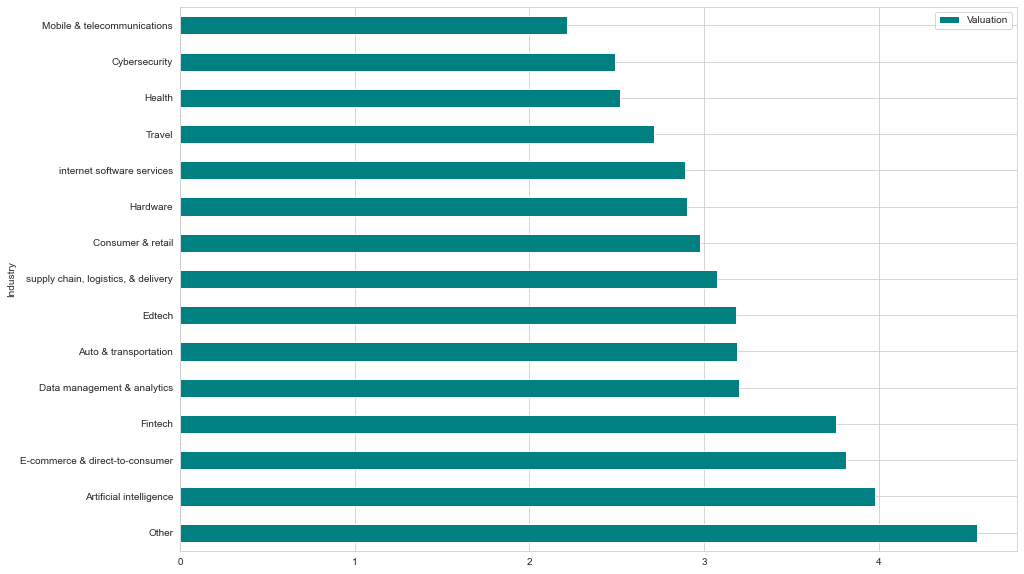

In [59]:
sns.set_style('whitegrid')
df4.sort_values(by='Valuation', ascending=False).head(20).plot(kind='barh', y='Valuation' , figsize=(15, 10), color='teal' , rot=0)